# **Analisis Gaji Berdasarkan Sektor Pekerjaan dan Pendidikan Akhir**

by: Zagho

## **Mepersiapkan Data**

In [2]:
# ===== CELL 1: Import Libraries =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


In [3]:
# ===== CELL 2: Load Data =====
# Membaca file CSV
file_path = 'Rata-Rata Upah_Gaji Bersih Sebulan Buruh_Karyawan_Pegawai Menurut Pendidikan Tertinggi yang Ditamatkan dan Lapangan Pekerjaan Utama di 17 Sektor, 2024.csv'

# Membaca dengan header yang kompleks
df_raw = pd.read_csv(file_path, header=None)

print("Data berhasil dimuat!")
print(f"Shape data: {df_raw.shape}")
print("\nPreview 5 baris pertama:")
print(df_raw.head())

Data berhasil dimuat!
Shape data: (14, 55)

Preview 5 baris pertama:
                                            0   \
0  Pendidikan Tertinggi yang Ditamatkan + Rata   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

                                                  1        2        3   \
0                                                NaN      NaN      NaN   
1  Rata-Rata Upah/Gaji Bersih Sebulan Buruh/Karya...      NaN      NaN   
2               A Pertanian, Kehutanan dan Perikanan      NaN      NaN   
3                                               2024      NaN      NaN   
4                                           Februari  Agustus  Tahunan   

                              4        5        6                      7   \
0                            NaN      NaN      NaN                    NaN   
1                            Na

In [4]:
# ===== CELL 3: Eksplorasi Struktur Data =====
print("=== EKSPLORASI STRUKTUR DATA ===")
print(f"Jumlah baris: {df_raw.shape[0]}")
print(f"Jumlah kolom: {df_raw.shape[1]}")
print("\nTipe data:")
print(df_raw.dtypes.value_counts())

# Melihat beberapa baris pertama untuk memahami struktur
print("\n10 baris pertama:")
for i in range(min(10, len(df_raw))):
    print(f"Baris {i}: {df_raw.iloc[i, 0] if pd.notna(df_raw.iloc[i, 0]) else 'NaN'}")

=== EKSPLORASI STRUKTUR DATA ===
Jumlah baris: 14
Jumlah kolom: 55

Tipe data:
object    55
Name: count, dtype: int64

10 baris pertama:
Baris 0: Pendidikan Tertinggi yang Ditamatkan + Rata
Baris 1: NaN
Baris 2: NaN
Baris 3: NaN
Baris 4: NaN
Baris 5: Tidak/Belum Pernah Sekolah
Baris 6: Tidak/Belum Tamat SD
Baris 7: Sekolah Dasar
Baris 8: Sekolah Menegah Pertama
Baris 9: Sekolah Menengah Atas (Umum)


In [5]:
# ===== CELL 4: Identifikasi Header dan Data =====
print("=== IDENTIFIKASI HEADER DAN DATA ===")

# Mencari baris yang berisi nama sektor (biasanya di baris ke-2 atau ke-3)
header_row = None
data_start_row = None

for i in range(len(df_raw)):
    if pd.notna(df_raw.iloc[i, 1]) and "Pertanian" in str(df_raw.iloc[i, 1]):
        header_row = i
        print(f"Header ditemukan di baris: {i}")
        break

# Mencari baris mulai data (biasanya setelah header tahun/periode)
for i in range(header_row + 1 if header_row else 0, len(df_raw)):
    if pd.notna(df_raw.iloc[i, 0]) and any(keyword in str(df_raw.iloc[i, 0]).lower() 
                                          for keyword in ['tidak', 'sekolah', 'diploma', 'universitas']):
        data_start_row = i
        print(f"Data mulai di baris: {i}")
        break

print(f"\nHeader row: {header_row}")
print(f"Data start row: {data_start_row}")

=== IDENTIFIKASI HEADER DAN DATA ===
Header ditemukan di baris: 2
Data mulai di baris: 5

Header row: 2
Data start row: 5


In [6]:
# ===== CELL 5: Ekstrak Header Sektor =====
print("=== EKSTRAK HEADER SEKTOR ===")

# Ekstrak nama-nama sektor dari header
sectors = []
if header_row is not None:
    header_data = df_raw.iloc[header_row].values
    for i, val in enumerate(header_data):
        if pd.notna(val) and i > 0:  # Skip kolom pertama (pendidikan)
            sector_name = str(val).strip()
            if sector_name and sector_name not in ['Rata', '2024', 'Februari', 'Agustus', 'Tahunan']:
                sectors.append(sector_name)

print(f"Sektor yang ditemukan ({len(sectors)}):")
for i, sector in enumerate(sectors, 1):
    print(f"{i}. {sector}")

=== EKSTRAK HEADER SEKTOR ===
Sektor yang ditemukan (18):
1. A Pertanian, Kehutanan dan Perikanan
2. B Pertambangan dan Penggalian
3. C Industri Pengolahan
4. D Pengadaan Listrik dan Gas
5. E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6. F Konstruksi
7. G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8. H Transportasi dan Pergudangan
9. I Penyediaan Akomodasi dan Makan Minum
10. J Informasi dan Komunikasi
11. K Jasa Keuangan dan Asuransi
12. L Real Estate
13. M,N Jasa Perusahaan
14. O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15. P Jasa Pendidikan
16. Q Jasa Kesehatan dan Kegiatan Sosial
17. R,S,T,U Jasa Lainnya
18. Total


In [8]:
# ===== CELL 6: Ekstrak Data Pendidikan dan Gaji =====
print("=== EKSTRAK DATA PENDIDIKAN DAN GAJI ===")

# Ekstrak level pendidikan
education_levels = []
if data_start_row is not None:
    for i in range(data_start_row, len(df_raw)):
        education = df_raw.iloc[i, 0]
        if pd.notna(education):
            education_str = str(education).strip()
            if education_str and education_str != 'Rata-Rata':  # Skip baris rata-rata
                education_levels.append(education_str)

print(f"Level pendidikan yang ditemukan ({len(education_levels)}):")
for i, edu in enumerate(education_levels, 1):
    print(f"{i}. {edu}")

=== EKSTRAK DATA PENDIDIKAN DAN GAJI ===
Level pendidikan yang ditemukan (8):
1. Tidak/Belum Pernah Sekolah
2. Tidak/Belum Tamat SD
3. Sekolah Dasar
4. Sekolah Menegah Pertama
5. Sekolah Menengah Atas (Umum)
6. Sekolah Menengah Atas (Kejuruan)
7. Diploma I/II/III/Akademi
8. Universitas


In [9]:
# ===== CELL 7: Struktur Data untuk Transformasi =====
print("=== PERSIAPAN TRANSFORMASI DATA ===")

# Menentukan posisi kolom untuk setiap sektor
# Setiap sektor memiliki 3 kolom (Februari, Agustus, Tahunan)
sector_columns = {}
col_start = 1  # Mulai dari kolom ke-1 (setelah kolom pendidikan)

for i, sector in enumerate(sectors):
    sector_columns[sector] = {
        'februari': col_start + (i * 3),
        'agustus': col_start + (i * 3) + 1,
        'tahunan': col_start + (i * 3) + 2
    }

print("Mapping kolom per sektor:")
for sector, cols in list(sector_columns.items())[:3]:  # Tampilkan 3 pertama sebagai contoh
    print(f"{sector}: Februari={cols['februari']}, Agustus={cols['agustus']}, Tahunan={cols['tahunan']}")
print("...")

=== PERSIAPAN TRANSFORMASI DATA ===
Mapping kolom per sektor:
A Pertanian, Kehutanan dan Perikanan: Februari=1, Agustus=2, Tahunan=3
B Pertambangan dan Penggalian: Februari=4, Agustus=5, Tahunan=6
C Industri Pengolahan: Februari=7, Agustus=8, Tahunan=9
...


In [10]:
# ===== CELL 8: Buat DataFrame Terstruktur =====
print("=== MEMBUAT DATAFRAME TERSTRUKTUR ===")

# Buat list untuk menyimpan data yang sudah dibersihkan
cleaned_data = []

# Ekstrak data untuk setiap kombinasi pendidikan dan sektor
if data_start_row is not None:
    for i in range(data_start_row, len(df_raw)):
        education = df_raw.iloc[i, 0]
        if pd.notna(education):
            education_str = str(education).strip()
            if education_str and education_str != 'Rata-Rata':
                
                # Untuk setiap sektor, ambil data gaji
                for sector, cols in sector_columns.items():
                    try:
                        # Ambil data Februari dan Agustus (kita akan fokus pada data aktual)
                        gaji_feb = df_raw.iloc[i, cols['februari']] if cols['februari'] < df_raw.shape[1] else np.nan
                        gaji_aug = df_raw.iloc[i, cols['agustus']] if cols['agustus'] < df_raw.shape[1] else np.nan
                        
                        # Konversi ke float jika memungkinkan
                        if pd.notna(gaji_feb) and str(gaji_feb) != '-':
                            try:
                                gaji_feb = float(str(gaji_feb).replace(',', ''))
                                cleaned_data.append({
                                    'pendidikan': education_str,
                                    'sektor': sector,
                                    'periode': 'Februari',
                                    'gaji': gaji_feb
                                })
                            except:
                                pass
                        
                        if pd.notna(gaji_aug) and str(gaji_aug) != '-':
                            try:
                                gaji_aug = float(str(gaji_aug).replace(',', ''))
                                cleaned_data.append({
                                    'pendidikan': education_str,
                                    'sektor': sector,
                                    'periode': 'Agustus',
                                    'gaji': gaji_aug
                                })
                            except:
                                pass
                                
                    except Exception as e:
                        continue

# Buat DataFrame dari data yang sudah dibersihkan
df_clean = pd.DataFrame(cleaned_data)

print(f"Data berhasil dibersihkan!")
print(f"Shape data bersih: {df_clean.shape}")
print(f"Jumlah records: {len(df_clean)}")

=== MEMBUAT DATAFRAME TERSTRUKTUR ===
Data berhasil dibersihkan!
Shape data bersih: (271, 4)
Jumlah records: 271


In [11]:
# ===== CELL 9: Eksplorasi Data Bersih =====
print("=== EKSPLORASI DATA BERSIH ===")

print("Info DataFrame:")
print(df_clean.info())

print(f"\nJumlah data per pendidikan:")
print(df_clean['pendidikan'].value_counts())

print(f"\nJumlah data per sektor:")
print(df_clean['sektor'].value_counts())

print(f"\nJumlah data per periode:")
print(df_clean['periode'].value_counts())

print(f"\nStatistik gaji:")
print(df_clean['gaji'].describe())

=== EKSPLORASI DATA BERSIH ===
Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pendidikan  271 non-null    object 
 1   sektor      271 non-null    object 
 2   periode     271 non-null    object 
 3   gaji        271 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.6+ KB
None

Jumlah data per pendidikan:
pendidikan
Sekolah Menegah Pertama             36
Sekolah Dasar                       36
Sekolah Menengah Atas (Kejuruan)    36
Sekolah Menengah Atas (Umum)        36
Diploma I/II/III/Akademi            36
Universitas                         36
Tidak/Belum Tamat SD                34
Tidak/Belum Pernah Sekolah          21
Name: count, dtype: int64

Jumlah data per sektor:
sektor
A Pertanian, Kehutanan dan Perikanan                                16
C Industri Pengolahan                                            

In [12]:
# ===== CELL 10: Pembersihan Data Lanjutan =====
print("=== PEMBERSIHAN DATA LANJUTAN ===")

# Cek missing values
print("Missing values:")
print(df_clean.isnull().sum())

# Cek dan hapus duplikat
print(f"\nJumlah duplikat: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()

# Cek outliers menggunakan IQR
Q1 = df_clean['gaji'].quantile(0.25)
Q3 = df_clean['gaji'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection (IQR method):")
print(f"Q1: {Q1:,.2f}")
print(f"Q3: {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")

outliers = df_clean[(df_clean['gaji'] < lower_bound) | (df_clean['gaji'] > upper_bound)]
print(f"Jumlah outliers: {len(outliers)}")

# Tampilkan beberapa outliers
if len(outliers) > 0:
    print("\nContoh outliers:")
    print(outliers.head())

=== PEMBERSIHAN DATA LANJUTAN ===
Missing values:
pendidikan    0
sektor        0
periode       0
gaji          0
dtype: int64

Jumlah duplikat: 0

Outlier detection (IQR method):
Q1: 1,945,658.39
Q3: 3,868,725.10
IQR: 1,923,066.72
Lower bound: -938,941.70
Upper bound: 6,753,325.19
Jumlah outliers: 22

Contoh outliers:
                   pendidikan                          sektor   periode  \
201  Diploma I/II/III/Akademi   B Pertambangan dan Penggalian  Februari   
202  Diploma I/II/III/Akademi   B Pertambangan dan Penggalian   Agustus   
206  Diploma I/II/III/Akademi     D Pengadaan Listrik dan Gas   Agustus   
210  Diploma I/II/III/Akademi                    F Konstruksi   Agustus   
213  Diploma I/II/III/Akademi  H Transportasi dan Pergudangan  Februari   

           gaji  
201  7478925.68  
202  9671400.44  
206  6976905.50  
210  6929918.07  
213  7597623.22  


In [13]:
# ===== CELL 11: Encoding Variabel Kategorikal =====
print("=== ENCODING VARIABEL KATEGORIKAL ===")

# Buat copy untuk encoding
df_encoded = df_clean.copy()

# Label encoding untuk pendidikan (berdasarkan tingkat pendidikan)
education_mapping = {
    'Tidak/Belum Pernah Sekolah': 0,
    'Tidak/Belum Tamat SD': 1,
    'Sekolah Dasar': 2,
    'Sekolah Menegah Pertama': 3,
    'Sekolah Menengah Atas (Umum)': 4,
    'Sekolah Menengah Atas (Kejuruan)': 5,
    'Diploma I/II/III/Akademi': 6,
    'Universitas': 7
}

df_encoded['pendidikan_encoded'] = df_encoded['pendidikan'].map(education_mapping)

# One-hot encoding untuk sektor
sektor_dummies = pd.get_dummies(df_encoded['sektor'], prefix='sektor')
df_encoded = pd.concat([df_encoded, sektor_dummies], axis=1)

# Encoding untuk periode
periode_mapping = {'Februari': 0, 'Agustus': 1}
df_encoded['periode_encoded'] = df_encoded['periode'].map(periode_mapping)

print("Encoding selesai!")
print(f"Shape data setelah encoding: {df_encoded.shape}")

# Tampilkan mapping pendidikan
print("\nMapping pendidikan:")
for edu, code in education_mapping.items():
    print(f"{code}: {edu}")

=== ENCODING VARIABEL KATEGORIKAL ===
Encoding selesai!
Shape data setelah encoding: (271, 24)

Mapping pendidikan:
0: Tidak/Belum Pernah Sekolah
1: Tidak/Belum Tamat SD
2: Sekolah Dasar
3: Sekolah Menegah Pertama
4: Sekolah Menengah Atas (Umum)
5: Sekolah Menengah Atas (Kejuruan)
6: Diploma I/II/III/Akademi
7: Universitas


In [14]:
# ===== CELL 12: Agregasi Data (Rata-rata per Pendidikan-Sektor) =====
print("=== AGREGASI DATA ===")

# Buat dataset agregat untuk modeling (rata-rata gaji per pendidikan-sektor)
df_agg = df_clean.groupby(['pendidikan', 'sektor'])['gaji'].agg(['mean', 'count']).reset_index()
df_agg.columns = ['pendidikan', 'sektor', 'gaji_rata', 'jumlah_data']

# Tambahkan encoding
df_agg['pendidikan_encoded'] = df_agg['pendidikan'].map(education_mapping)

# One-hot encoding untuk sektor di data agregat
sektor_dummies_agg = pd.get_dummies(df_agg['sektor'], prefix='sektor')
df_final = pd.concat([df_agg, sektor_dummies_agg], axis=1)

print(f"Data agregat berhasil dibuat!")
print(f"Shape data agregat: {df_final.shape}")
print(f"Jumlah kombinasi pendidikan-sektor: {len(df_final)}")

print("\nContoh data agregat:")
print(df_final.head())

=== AGREGASI DATA ===
Data agregat berhasil dibuat!
Shape data agregat: (138, 23)
Jumlah kombinasi pendidikan-sektor: 138

Contoh data agregat:
                 pendidikan  \
0  Diploma I/II/III/Akademi   
1  Diploma I/II/III/Akademi   
2  Diploma I/II/III/Akademi   
3  Diploma I/II/III/Akademi   
4  Diploma I/II/III/Akademi   

                                              sektor    gaji_rata  \
0               A Pertanian, Kehutanan dan Perikanan  3608079.195   
1                      B Pertambangan dan Penggalian  8575163.060   
2                              C Industri Pengolahan  5550847.055   
3                        D Pengadaan Listrik dan Gas  6436468.600   
4  E Pengadaan Air, Pengelolaan Sampah, Limbah da...  4017014.825   

   jumlah_data  pendidikan_encoded  \
0            2                   6   
1            2                   6   
2            2                   6   
3            2                   6   
4            2                   6   

   sektor_A Pertanian, Ke

In [15]:
# ===== CELL 13: Simpan Data Bersih =====
print("=== MENYIMPAN DATA BERSIH ===")

# Simpan data mentah yang sudah dibersihkan
df_clean.to_csv('data_gaji_clean.csv', index=False)
print("✓ Data mentah bersih disimpan: data_gaji_clean.csv")

# Simpan data dengan encoding lengkap
df_encoded.to_csv('data_gaji_encoded.csv', index=False)
print("✓ Data dengan encoding disimpan: data_gaji_encoded.csv")

# Simpan data agregat untuk modeling
df_final.to_csv('data_gaji_final.csv', index=False)
print("✓ Data final untuk modeling disimpan: data_gaji_final.csv")

print("\n=== RINGKASAN PREPROCESSING ===")
print(f"📊 Data asli: {df_raw.shape}")
print(f"🧹 Data bersih: {df_clean.shape}")
print(f"🔢 Data encoded: {df_encoded.shape}")
print(f"📈 Data final: {df_final.shape}")
print(f"🎯 Siap untuk tahap modeling!")

=== MENYIMPAN DATA BERSIH ===
✓ Data mentah bersih disimpan: data_gaji_clean.csv


PermissionError: [Errno 13] Permission denied: 'data_gaji_encoded.csv'

In [16]:
print(df_final)

                   pendidikan  \
0    Diploma I/II/III/Akademi   
1    Diploma I/II/III/Akademi   
2    Diploma I/II/III/Akademi   
3    Diploma I/II/III/Akademi   
4    Diploma I/II/III/Akademi   
..                        ...   
133               Universitas   
134               Universitas   
135               Universitas   
136               Universitas   
137               Universitas   

                                                sektor    gaji_rata  \
0                 A Pertanian, Kehutanan dan Perikanan  3608079.195   
1                        B Pertambangan dan Penggalian  8575163.060   
2                                C Industri Pengolahan  5550847.055   
3                          D Pengadaan Listrik dan Gas  6436468.600   
4    E Pengadaan Air, Pengelolaan Sampah, Limbah da...  4017014.825   
..                                                 ...          ...   
133  O Administrasi Pemerintahan, Pertahanan dan Ja...  5143877.035   
134                                

## **Regresi Linear Ganda**

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Membaca data
df = pd.read_csv('data_gaji_final.csv')

print("=== ANALISIS REGRESI LINEAR GANDA ===")
print(f"Total data: {len(df)} baris")
print(f"Kolom yang tersedia: {list(df.columns)}")

# Menampilkan info dasar tentang data
print("\n=== INFO DATASET ===")
print(f"Jumlah level pendidikan: {df['pendidikan'].nunique()}")
print(f"Level pendidikan: {df['pendidikan'].unique()}")
print(f"Jumlah sektor: {df['sektor'].nunique()}")

# Memfilter data untuk menghilangkan baris dengan sektor 'Total'
df_filtered = df[df['sektor'] != 'Total'].copy()
print(f"\nData setelah filter (tanpa 'Total'): {len(df_filtered)} baris")

# Menyiapkan fitur (X) dan target (y)
# Menggunakan pendidikan_encoded dan semua kolom sektor sebagai fitur
feature_cols = ['pendidikan_encoded']

# Menambahkan kolom sektor (one-hot encoded)
sektor_cols = [col for col in df_filtered.columns if col.startswith('sektor_') and col != 'sektor_Total']
feature_cols.extend(sektor_cols)

X = df_filtered[feature_cols]
y = df_filtered['gaji_rata']

=== ANALISIS REGRESI LINEAR GANDA ===
Total data: 138 baris
Kolom yang tersedia: ['pendidikan', 'sektor', 'gaji_rata', 'jumlah_data', 'pendidikan_encoded', 'sektor_A Pertanian, Kehutanan dan Perikanan', 'sektor_B Pertambangan dan Penggalian', 'sektor_C Industri Pengolahan', 'sektor_D Pengadaan Listrik dan Gas', 'sektor_E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang', 'sektor_F Konstruksi', 'sektor_G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor', 'sektor_H Transportasi dan Pergudangan', 'sektor_I Penyediaan Akomodasi dan Makan Minum', 'sektor_J Informasi dan Komunikasi', 'sektor_K Jasa Keuangan dan Asuransi', 'sektor_L Real Estate', 'sektor_M,N Jasa Perusahaan', 'sektor_O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib', 'sektor_P Jasa Pendidikan', 'sektor_Q Jasa Kesehatan dan Kegiatan Sosial', 'sektor_R,S,T,U Jasa Lainnya', 'sektor_Total']

=== INFO DATASET ===
Jumlah level pendidikan: 8
Level pendidikan: ['Diploma I/II/III/Akademi' 'Sekolah 

In [21]:
print(f"\n=== FITUR YANG DIGUNAKAN ===")
print(f"Jumlah fitur: {len(feature_cols)}")
print("Fitur pendidikan:")
print("- pendidikan_encoded")
print(f"\nFitur sektor ({len(sektor_cols)} sektor):")
for i, col in enumerate(sektor_cols, 1):
    sektor_name = col.replace('sektor_', '').replace('True', '').replace('False', '')
    print(f"{i:2d}. {sektor_name}")

# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n=== PEMBAGIAN DATA ===")
print(f"Data training: {len(X_train)} sampel")
print(f"Data testing: {len(X_test)} sampel")

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Menghitung metrik evaluasi
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\n=== EVALUASI MODEL ===")
print(f"Training Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MSE: {train_mse:,.2f}")
print(f"  MAE: {train_mae:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse):,.2f}")

print(f"\nTesting Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MSE: {test_mse:,.2f}")
print(f"  MAE: {test_mae:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse):,.2f}")


=== FITUR YANG DIGUNAKAN ===
Jumlah fitur: 18
Fitur pendidikan:
- pendidikan_encoded

Fitur sektor (17 sektor):
 1. A Pertanian, Kehutanan dan Perikanan
 2. B Pertambangan dan Penggalian
 3. C Industri Pengolahan
 4. D Pengadaan Listrik dan Gas
 5. E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
 6. F Konstruksi
 7. G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
 8. H Transportasi dan Pergudangan
 9. I Penyediaan Akomodasi dan Makan Minum
10. J Informasi dan Komunikasi
11. K Jasa Keuangan dan Asuransi
12. L Real Estate
13. M,N Jasa Perusahaan
14. O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15. P Jasa Pendidikan
16. Q Jasa Kesehatan dan Kegiatan Sosial
17. R,S,T,U Jasa Lainnya

=== PEMBAGIAN DATA ===
Data training: 104 sampel
Data testing: 26 sampel

=== EVALUASI MODEL ===
Training Set:
  R² Score: 0.7772
  MSE: 852,023,265,640.51
  MAE: 705,759.45
  RMSE: 923,051.06

Testing Set:
  R² Score: 0.6994
  MSE: 823,509,906,327.21
  MAE: 736,7

In [22]:
# Menampilkan persamaan regresi
print(f"\n=== PERSAMAAN REGRESI LINEAR GANDA ===")
intercept = model.intercept_
coefficients = model.coef_

equation = f"gaji_rata = {intercept:,.2f}"
print(f"Intercept (β₀): {intercept:,.2f}")
print(f"\nKoefisien:")

for i, (feature, coef) in enumerate(zip(feature_cols, coefficients)):
    if feature == 'pendidikan_encoded':
        print(f"β₁ (pendidikan): {coef:,.2f}")
        if coef >= 0:
            equation += f" + {coef:,.2f} × pendidikan"
        else:
            equation += f" - {abs(coef):,.2f} × pendidikan"
    else:
        sektor_name = feature.replace('sektor_', '')
        print(f"β{i+1} ({sektor_name}): {coef:,.2f}")
        if coef >= 0:
            equation += f" + {coef:,.2f} × {sektor_name}"
        else:
            equation += f" - {abs(coef):,.2f} × {sektor_name}"

print(f"\nPersamaan lengkap:")
print(equation)

# Analisis pentingnya fitur
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n=== TINGKAT KEPENTINGAN FITUR ===")
print("(Berdasarkan nilai absolut koefisien)")
for i, row in feature_importance.head(10).iterrows():
    feature_name = row['Feature'].replace('sektor_', '') if 'sektor_' in row['Feature'] else row['Feature']
    print(f"{i+1:2d}. {feature_name}: {row['Coefficient']:,.2f}")


=== PERSAMAAN REGRESI LINEAR GANDA ===
Intercept (β₀): 852,560.38

Koefisien:
β₁ (pendidikan): 657,656.54
β2 (A Pertanian, Kehutanan dan Perikanan): -553,546.14
β3 (B Pertambangan dan Penggalian): 2,277,892.85
β4 (C Industri Pengolahan): 42,347.53
β5 (D Pengadaan Listrik dan Gas): 1,072,788.03
β6 (E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang): -83,719.16
β7 (F Konstruksi): 816,188.39
β8 (G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor): -430,686.22
β9 (H Transportasi dan Pergudangan): 606,067.47
β10 (I Penyediaan Akomodasi dan Makan Minum): -767,728.77
β11 (J Informasi dan Komunikasi): 241,998.58
β12 (K Jasa Keuangan dan Asuransi): 162,031.03
β13 (L Real Estate): 431,799.38
β14 (M,N Jasa Perusahaan): 26,815.07
β15 (O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib): -722,373.63
β16 (P Jasa Pendidikan): -1,356,846.96
β17 (Q Jasa Kesehatan dan Kegiatan Sosial): -912,730.39
β18 (R,S,T,U Jasa Lainnya): -850,297.08

Persamaan lengkap:
gaji_rata 

In [23]:
# Prediksi untuk beberapa contoh
print(f"\n=== CONTOH PREDIKSI ===")

# Contoh 1: Pendidikan Universitas (7) di sektor IT
example1 = np.zeros(len(feature_cols))
example1[0] = 7  # pendidikan_encoded untuk Universitas
# Mencari index untuk sektor J (IT)
if 'sektor_J Informasi dan Komunikasi' in feature_cols:
    it_index = feature_cols.index('sektor_J Informasi dan Komunikasi')
    example1[it_index] = 1

pred1 = model.predict([example1])[0]
print(f"1. Universitas + IT: Rp {pred1:,.0f}")

# Contoh 2: Pendidikan SMA (4) di sektor Pertanian
example2 = np.zeros(len(feature_cols))
example2[0] = 4  # pendidikan_encoded untuk SMA
if 'sektor_A Pertanian, Kehutanan dan Perikanan' in feature_cols:
    agri_index = feature_cols.index('sektor_A Pertanian, Kehutanan dan Perikanan')
    example2[agri_index] = 1

pred2 = model.predict([example2])[0]
print(f"2. SMA + Pertanian: Rp {pred2:,.0f}")

# Contoh 3: Pendidikan Diploma (6) di sektor Keuangan
example3 = np.zeros(len(feature_cols))
example3[0] = 6  # pendidikan_encoded untuk Diploma
if 'sektor_K Jasa Keuangan dan Asuransi' in feature_cols:
    finance_index = feature_cols.index('sektor_K Jasa Keuangan dan Asuransi')
    example3[finance_index] = 1

pred3 = model.predict([example3])[0]
print(f"3. Diploma + Keuangan: Rp {pred3:,.0f}")


=== CONTOH PREDIKSI ===
1. Universitas + IT: Rp 5,698,155
2. SMA + Pertanian: Rp 2,929,640
3. Diploma + Keuangan: Rp 4,960,531


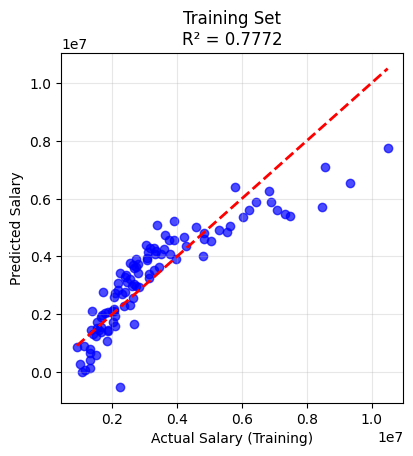

In [24]:
# Visualisasi hasil
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted (Training)
plt.subplot(2, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Salary (Training)')
plt.ylabel('Predicted Salary')
plt.title(f'Training Set\nR² = {train_r2:.4f}')
plt.grid(True, alpha=0.3)

plt.show()

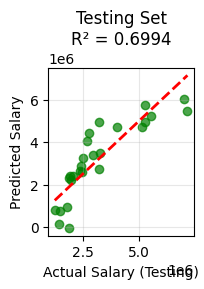

In [25]:
# Plot 2: Actual vs Predicted (Testing)
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary (Testing)')
plt.ylabel('Predicted Salary')
plt.title(f'Testing Set\nR² = {test_r2:.4f}')
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
# Plot 3: Residuals (Training)
plt.subplot(2, 3, 3)
residuals_train = y_train - y_pred_train
plt.scatter(y_pred_train, residuals_train, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary (Training)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Training)')
plt.grid(True, alpha=0.3)

In [ ]:
# Plot 4: Residuals (Testing)
plt.subplot(2, 3, 4)
residuals_test = y_test - y_pred_test
plt.scatter(y_pred_test, residuals_test, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary (Testing)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Testing)')
plt.grid(True, alpha=0.3)

In [ ]:
# Plot 5: Feature Importance
plt.subplot(2, 3, 5)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['Abs_Coefficient'])
plt.yticks(range(len(top_features)), 
           [f.replace('sektor_', '') for f in top_features['Feature']])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance')
plt.grid(True, alpha=0.3)

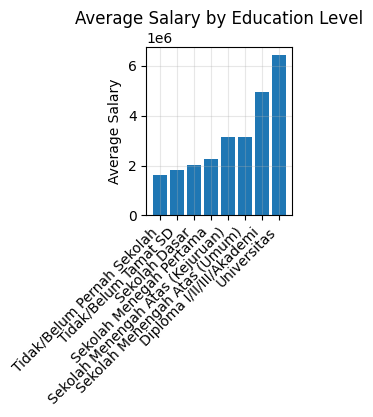

In [26]:
# Plot 6: Distribution of Salaries by Education Level
plt.subplot(2, 3, 6)
education_salary = df_filtered.groupby('pendidikan')['gaji_rata'].mean().sort_values()
plt.bar(range(len(education_salary)), education_salary.values)
plt.xticks(range(len(education_salary)), education_salary.index, rotation=45, ha='right')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.grid(True, alpha=0.3)

plt.show()

In [13]:
# Fungsi untuk prediksi interaktif
def predict_salary(education_level, sector):
    """
    Prediksi gaji berdasarkan tingkat pendidikan dan sektor
    
    Parameters:
    education_level (str): Tingkat pendidikan
    sector (str): Nama sektor
    """
    # Mapping pendidikan ke encoded value
    education_mapping = {
        'Tidak/Belum Pernah Sekolah': 0,
        'Tidak/Belum Tamat SD': 1,
        'Sekolah Dasar': 2,
        'Sekolah Menegah Pertama': 3,
        'Sekolah Menengah Atas (Umum)': 4,
        'Sekolah Menengah Atas (Kejuruan)': 5,
        'Diploma I/II/III/Akademi': 6,
        'Universitas': 7
    }
    
    if education_level not in education_mapping:
        print(f"Tingkat pendidikan '{education_level}' tidak dikenali.")
        return None
    
    # Membuat input untuk prediksi
    input_data = np.zeros(len(feature_cols))
    input_data[0] = education_mapping[education_level]
    
    # Mencari kolom sektor yang sesuai
    sector_col = None
    for col in feature_cols:
        if sector.lower() in col.lower():
            sector_col = col
            break
    
    if sector_col is None:
        print(f"Sektor '{sector}' tidak ditemukan.")
        print("Sektor yang tersedia:")
        for col in sektor_cols:
            print(f"- {col.replace('sektor_', '')}")
        return None
    
    sector_index = feature_cols.index(sector_col)
    input_data[sector_index] = 1
    
    prediction = model.predict([input_data])[0]
    return prediction

print(f"\n=== FUNGSI PREDIKSI TERSEDIA ===")
print("Gunakan fungsi predict_salary(education_level, sector) untuk prediksi")
print("\nContoh penggunaan:")
print("predict_salary('Universitas', 'Informasi')")
print("predict_salary('Diploma I/II/III/Akademi', 'Keuangan')")

predict_salary('Diploma I/II/III/Akademi', 'Keuangan')


=== FUNGSI PREDIKSI TERSEDIA ===
Gunakan fungsi predict_salary(education_level, sector) untuk prediksi

Contoh penggunaan:
predict_salary('Universitas', 'Informasi')
predict_salary('Diploma I/II/III/Akademi', 'Keuangan')


C:\Users\Inzaghi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(4960530.675109286)

In [14]:
print(f"\n=== FUNGSI PREDIKSI TERSEDIA ===")
print("Gunakan fungsi predict_salary(education_level, sector) untuk prediksi")
print("\nContoh penggunaan:")
print("predict_salary('Universitas', 'Informasi')")
print("predict_salary('Diploma I/II/III/Akademi', 'Keuangan')")

# Menampilkan summary akhir
print(f"\n=== SUMMARY MODEL ===")
print(f"Model: Regresi Linear Ganda")
print(f"Fitur: {len(feature_cols)} (1 pendidikan + {len(sektor_cols)} sektor)")
print(f"Akurasi (R²): {test_r2:.4f}")
print(f"Error rata-rata: Rp {test_mae:,.0f}")
print(f"Persamaan: gaji = f(pendidikan, sektor)")


=== FUNGSI PREDIKSI TERSEDIA ===
Gunakan fungsi predict_salary(education_level, sector) untuk prediksi

Contoh penggunaan:
predict_salary('Universitas', 'Informasi')
predict_salary('Diploma I/II/III/Akademi', 'Keuangan')

=== SUMMARY MODEL ===
Model: Regresi Linear Ganda
Fitur: 18 (1 pendidikan + 17 sektor)
Akurasi (R²): 0.6994
Error rata-rata: Rp 736,710
Persamaan: gaji = f(pendidikan, sektor)


## **Regresi Polinomial**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Membaca data
df = pd.read_csv('data_gaji_final.csv')

print("=== ANALISIS REGRESI POLINOMIAL ===")
print(f"Total data: {len(df)} baris")
print(f"Kolom yang tersedia: {list(df.columns)}")

# Menampilkan info dasar tentang data
print("\n=== INFO DATASET ===")
print(f"Jumlah level pendidikan: {df['pendidikan'].nunique()}")
print(f"Level pendidikan: {df['pendidikan'].unique()}")
print(f"Jumlah sektor: {df['sektor'].nunique()}")

=== ANALISIS REGRESI POLINOMIAL ===
Total data: 138 baris
Kolom yang tersedia: ['pendidikan', 'sektor', 'gaji_rata', 'jumlah_data', 'pendidikan_encoded', 'sektor_A Pertanian, Kehutanan dan Perikanan', 'sektor_B Pertambangan dan Penggalian', 'sektor_C Industri Pengolahan', 'sektor_D Pengadaan Listrik dan Gas', 'sektor_E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang', 'sektor_F Konstruksi', 'sektor_G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor', 'sektor_H Transportasi dan Pergudangan', 'sektor_I Penyediaan Akomodasi dan Makan Minum', 'sektor_J Informasi dan Komunikasi', 'sektor_K Jasa Keuangan dan Asuransi', 'sektor_L Real Estate', 'sektor_M,N Jasa Perusahaan', 'sektor_O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib', 'sektor_P Jasa Pendidikan', 'sektor_Q Jasa Kesehatan dan Kegiatan Sosial', 'sektor_R,S,T,U Jasa Lainnya', 'sektor_Total']

=== INFO DATASET ===
Jumlah level pendidikan: 8
Level pendidikan: ['Diploma I/II/III/Akademi' 'Sekolah Da

In [18]:
print(f"\n=== FITUR YANG DIGUNAKAN ===")
print(f"Jumlah fitur original: {len(feature_cols)}")
print("Fitur pendidikan:")
print("- pendidikan_encoded")
print(f"\nFitur sektor ({len(sektor_cols)} sektor):")
for i, col in enumerate(sektor_cols, 1):
    sektor_name = col.replace('sektor_', '').replace('True', '').replace('False', '')
    print(f"{i:2d}. {sektor_name}")

# Menentukan derajat polinomial
polynomial_degree = 3
print(f"\n=== KONFIGURASI REGRESI POLINOMIAL ===")
print(f"Derajat polinomial: {polynomial_degree}")

# Membuat fitur polinomial
poly_features = PolynomialFeatures(degree=polynomial_degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Mendapatkan nama fitur polinomial
feature_names = poly_features.get_feature_names_out(feature_cols)
print(f"Jumlah fitur setelah transformasi polinomial: {len(feature_names)}")

# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print(f"\n=== PEMBAGIAN DATA ===")
print(f"Data training: {len(X_train)} sampel")
print(f"Data testing: {len(X_test)} sampel")

# Membuat dan melatih model regresi linear pada fitur polinomial
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Menghitung metrik evaluasi
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)


=== FITUR YANG DIGUNAKAN ===
Jumlah fitur original: 18
Fitur pendidikan:
- pendidikan_encoded

Fitur sektor (17 sektor):
 1. A Pertanian, Kehutanan dan Perikanan
 2. B Pertambangan dan Penggalian
 3. C Industri Pengolahan
 4. D Pengadaan Listrik dan Gas
 5. E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
 6. F Konstruksi
 7. G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
 8. H Transportasi dan Pergudangan
 9. I Penyediaan Akomodasi dan Makan Minum
10. J Informasi dan Komunikasi
11. K Jasa Keuangan dan Asuransi
12. L Real Estate
13. M,N Jasa Perusahaan
14. O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15. P Jasa Pendidikan
16. Q Jasa Kesehatan dan Kegiatan Sosial
17. R,S,T,U Jasa Lainnya

=== KONFIGURASI REGRESI POLINOMIAL ===
Derajat polinomial: 3
Jumlah fitur setelah transformasi polinomial: 1329

=== PEMBAGIAN DATA ===
Data training: 104 sampel
Data testing: 26 sampel


In [19]:
print(f"\n=== EVALUASI MODEL ===")
print(f"Training Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MSE: {train_mse:,.2f}")
print(f"  MAE: {train_mae:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse):,.2f}")

print(f"\nTesting Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MSE: {test_mse:,.2f}")
print(f"  MAE: {test_mae:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse):,.2f}")


=== EVALUASI MODEL ===
Training Set:
  R² Score: 0.9728
  MSE: 104,107,078,238.67
  MAE: 233,185.80
  RMSE: 322,656.28

Testing Set:
  R² Score: 0.7623
  MSE: 651,178,063,195.93
  MAE: 577,333.98
  RMSE: 806,956.05


In [20]:
# Menampilkan persamaan regresi polinomial
print(f"\n=== PERSAMAAN REGRESI POLINOMIAL (DERAJAT {polynomial_degree}) ===")
intercept = model.intercept_
coefficients = model.coef_

equation = f"gaji_rata = {intercept:,.2f}"
print(f"Intercept (β₀): {intercept:,.2f}")
print(f"\nKoefisien:")

# Menampilkan koefisien dengan nama fitur yang sesuai
for i, (feature_name, coef) in enumerate(zip(feature_names, coefficients)):
    # Format nama fitur untuk tampilan yang lebih baik
    if 'pendidikan_encoded' in feature_name and '^' not in feature_name:
        display_name = 'pendidikan'
        beta_name = f"β₁ (pendidikan)"
    elif 'pendidikan_encoded^' in feature_name:
        power = feature_name.split('^')[1]
        display_name = f'pendidikan^{power}'
        beta_name = f"β{i+1} (pendidikan^{power})"
    elif feature_name.startswith('sektor_'):
        # Fitur sektor linear
        sektor_name = feature_name.replace('sektor_', '')
        display_name = sektor_name
        beta_name = f"β{i+1} ({sektor_name})"
    else:
        # Fitur interaksi atau polinomial lainnya
        display_name = feature_name.replace('sektor_', '').replace('pendidikan_encoded', 'pendidikan')
        beta_name = f"β{i+1} ({display_name})"
    
    print(f"{beta_name}: {coef:,.6f}")
    
    # Menambahkan ke persamaan
    if coef >= 0:
        equation += f" + {coef:,.6f} × {display_name}"
    else:
        equation += f" - {abs(coef):,.6f} × {display_name}"

print(f"\nPersamaan lengkap:")
print(equation)


=== PERSAMAAN REGRESI POLINOMIAL (DERAJAT 3) ===
Intercept (β₀): 1,858,665.71

Koefisien:
β₁ (pendidikan): 183,200.140102
β2 (A Pertanian, Kehutanan dan Perikanan): -254,793.848767
β3 (B Pertambangan dan Penggalian): 170,377.149041
β4 (C Industri Pengolahan): -224,129.041776
β5 (D Pengadaan Listrik dan Gas): 1,027,351.738437
β6 (E Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang): -191,256.273822
β7 (F Konstruksi): 222,409.351551
β8 (G Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor): -188,139.508796
β9 (H Transportasi dan Pergudangan): 58,440.958873
β10 (I Penyediaan Akomodasi dan Makan Minum): -276,115.861016
β11 (J Informasi dan Komunikasi): 24,646.477439
β12 (K Jasa Keuangan dan Asuransi): 940,297.608348
β13 (L Real Estate): -211,854.955434
β14 (M,N Jasa Perusahaan): -232,622.902003
β15 (O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib): -383,416.019467
β16 (P Jasa Pendidikan): 27,653.732513
β17 (Q Jasa Kesehatan dan Kegiatan Sosial): -252,168

In [21]:
# Analisis pentingnya fitur (berdasarkan nilai absolut koefisien)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n=== TINGKAT KEPENTINGAN FITUR ===")
print("(Berdasarkan nilai absolut koefisien)")
for i in range(min(15, len(feature_importance))):  # Tampilkan top 15
    row = feature_importance.iloc[i]
    feature_name = row['Feature'].replace('sektor_', '').replace('pendidikan_encoded', 'pendidikan')
    print(f"{i+1:2d}. {feature_name}: {row['Coefficient']:,.6f}")

# Fungsi untuk membuat prediksi dengan input original
def predict_salary_polynomial(education_level, sector):
    """
    Prediksi gaji berdasarkan tingkat pendidikan dan sektor menggunakan model polinomial
    
    Parameters:
    education_level (str): Tingkat pendidikan
    sector (str): Nama sektor
    """
    # Mapping pendidikan ke encoded value
    education_mapping = {
        'Tidak/Belum Pernah Sekolah': 0,
        'Tidak/Belum Tamat SD': 1,
        'Sekolah Dasar': 2,
        'Sekolah Menegah Pertama': 3,
        'Sekolah Menengah Atas (Umum)': 4,
        'Sekolah Menengah Atas (Kejuruan)': 5,
        'Diploma I/II/III/Akademi': 6,
        'Universitas': 7
    }
    
    if education_level not in education_mapping:
        print(f"Tingkat pendidikan '{education_level}' tidak dikenali.")
        return None
    
    # Membuat input untuk prediksi (fitur original)
    input_data = np.zeros(len(feature_cols))
    input_data[0] = education_mapping[education_level]
    
    # Mencari kolom sektor yang sesuai
    sector_col = None
    for col in feature_cols:
        if sector.lower() in col.lower():
            sector_col = col
            break
    
    if sector_col is None:
        print(f"Sektor '{sector}' tidak ditemukan.")
        print("Sektor yang tersedia:")
        for col in sektor_cols:
            print(f"- {col.replace('sektor_', '')}")
        return None
    
    sector_index = feature_cols.index(sector_col)
    input_data[sector_index] = 1
    
    # Transformasi ke fitur polinomial
    input_poly = poly_features.transform([input_data])
    prediction = model.predict(input_poly)[0]
    return prediction


=== TINGKAT KEPENTINGAN FITUR ===
(Berdasarkan nilai absolut koefisien)
 1. D Pengadaan Listrik dan Gas: 1,027,351.738437
 2. D Pengadaan Listrik dan Gas^3: 1,027,351.738437
 3. D Pengadaan Listrik dan Gas^2: 1,027,351.738437
 4. K Jasa Keuangan dan Asuransi: 940,297.608348
 5. K Jasa Keuangan dan Asuransi^3: 940,297.608348
 6. K Jasa Keuangan dan Asuransi^2: 940,297.608348
 7. pendidikan D Pengadaan Listrik dan Gas: -703,091.087309
 8. pendidikan D Pengadaan Listrik dan Gas^2: -703,091.087309
 9. pendidikan K Jasa Keuangan dan Asuransi^2: -514,356.076490
10. pendidikan K Jasa Keuangan dan Asuransi: -514,356.076490
11. O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib: -383,416.019467
12. O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib^3: -383,416.019467
13. O Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib^2: -383,416.019467
14. pendidikan L Real Estate: 315,934.110525
15. pendidikan L Real Estate^2: 315,934.110525


In [ ]:
# Prediksi untuk beberapa contoh
print(f"\n=== CONTOH PREDIKSI ===")

# Contoh 1: Pendidikan Universitas (7) di sektor IT
pred1 = predict_salary_polynomial('Universitas', 'Informasi')
if pred1:
    print(f"1. Universitas + IT: Rp {pred1:,.0f}")

# Contoh 2: Pendidikan SMA (4) di sektor Pertanian
pred2 = predict_salary_polynomial('Sekolah Menengah Atas (Umum)', 'Pertanian')
if pred2:
    print(f"2. SMA + Pertanian: Rp {pred2:,.0f}")

# Contoh 3: Pendidikan Diploma (6) di sektor Keuangan
pred3 = predict_salary_polynomial('Diploma I/II/III/Akademi', 'Keuangan')
if pred3:
    print(f"3. Diploma + Keuangan: Rp {pred3:,.0f}")


=== CONTOH PREDIKSI ===
1. Universitas + IT: Rp 8,296,792
2. SMA + Pertanian: Rp 2,568,151
3. Diploma + Keuangan: Rp 4,925,342


<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

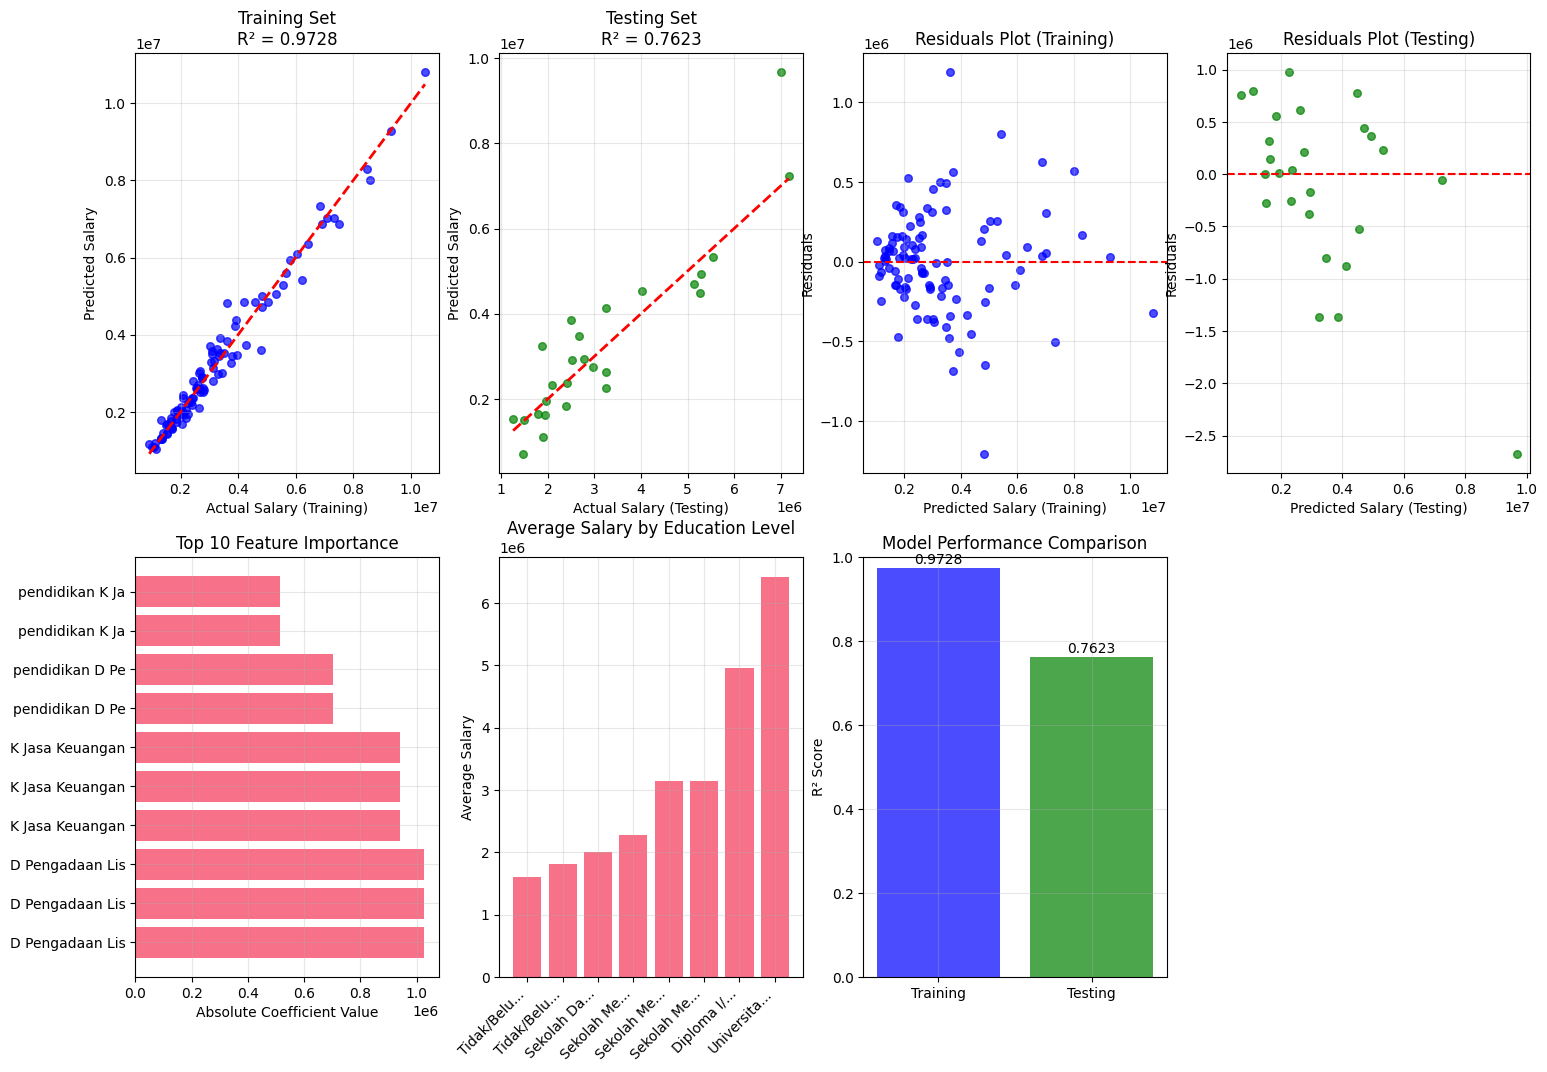

In [24]:
# Visualisasi hasil
plt.figure(figsize=(18, 12))

# Plot 1: Actual vs Predicted (Training)
plt.subplot(2, 4, 1)
plt.scatter(y_train, y_pred_train, alpha=0.7, color='blue', s=30)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Salary (Training)')
plt.ylabel('Predicted Salary')
plt.title(f'Training Set\nR² = {train_r2:.4f}')
plt.grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (Testing)
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_pred_test, alpha=0.7, color='green', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary (Testing)')
plt.ylabel('Predicted Salary')
plt.title(f'Testing Set\nR² = {test_r2:.4f}')
plt.grid(True, alpha=0.3)

# Plot 3: Residuals (Training)
plt.subplot(2, 4, 3)
residuals_train = y_train - y_pred_train
plt.scatter(y_pred_train, residuals_train, alpha=0.7, color='blue', s=30)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary (Training)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Training)')
plt.grid(True, alpha=0.3)

# Plot 4: Residuals (Testing)
plt.subplot(2, 4, 4)
residuals_test = y_test - y_pred_test
plt.scatter(y_pred_test, residuals_test, alpha=0.7, color='green', s=30)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary (Testing)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Testing)')
plt.grid(True, alpha=0.3)

# Plot 5: Feature Importance (Top 10)
plt.subplot(2, 4, 5)
top_features = feature_importance.head(10)
feature_labels = [f.replace('sektor_', '').replace('pendidikan_encoded', 'pendidikan')[:15] 
                 for f in top_features['Feature']]
plt.barh(range(len(top_features)), top_features['Abs_Coefficient'])
plt.yticks(range(len(top_features)), feature_labels)
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance')
plt.grid(True, alpha=0.3)

# Plot 6: Distribution of Salaries by Education Level
plt.subplot(2, 4, 6)
education_salary = df_filtered.groupby('pendidikan')['gaji_rata'].mean().sort_values()
plt.bar(range(len(education_salary)), education_salary.values)
plt.xticks(range(len(education_salary)), 
           [ed[:10] + '...' if len(ed) > 10 else ed for ed in education_salary.index], 
           rotation=45, ha='right')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.grid(True, alpha=0.3)

# Plot 7: Perbandingan R² Score
plt.subplot(2, 4, 7)
r2_scores = [train_r2, test_r2]
labels = ['Training', 'Testing']
colors = ['blue', 'green']
plt.bar(labels, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center')
plt.grid(True, alpha=0.3)

## **Random Forest Regression**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

In [27]:
print("=== PREDIKSI GAJI DENGAN RANDOM FOREST REGRESSION ===\n")

# 1. LOAD DATA
print("1. MEMUAT DATA")
print("-" * 50)

# Baca data dari file CSV yang sudah diupload
try:
    df = pd.read_csv('data_gaji_final.csv')
    print(f"✓ Data berhasil dimuat!")
    print(f"✓ Jumlah baris: {len(df)}")
    print(f"✓ Jumlah kolom: {len(df.columns)}")
except:
    print("✗ File tidak ditemukan. Membuat data sample...")
    # Jika file tidak ada, buat data sample berdasarkan struktur yang terlihat
    data_sample = {
        'pendidikan': ['Sekolah Dasar', 'SMP', 'SMA', 'Diploma', 'Universitas'] * 20,
        'sektor': ['A Pertanian', 'B Pertambangan', 'C Industri', 'D Listrik', 'E Air'] * 20,
        'gaji_rata': np.random.normal(4000000, 2000000, 100),
        'jumlah_data': np.random.randint(1, 5, 100),
        'pendidikan_encoded': [2, 3, 4, 6, 7] * 20
    }
    df = pd.DataFrame(data_sample)

=== PREDIKSI GAJI DENGAN RANDOM FOREST REGRESSION ===

1. MEMUAT DATA
--------------------------------------------------
✓ Data berhasil dimuat!
✓ Jumlah baris: 138
✓ Jumlah kolom: 23


In [29]:
print("\n2. EKSPLORASI DATA")
print("-" * 50)

# Tampilkan info dasar
print("Info Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# Tampilkan sample data
print("\nSample Data:")
print(df.head())


2. EKSPLORASI DATA
--------------------------------------------------
Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   pendidikan                                                               138 non-null    object 
 1   sektor                                                                   138 non-null    object 
 2   gaji_rata                                                                138 non-null    float64
 3   jumlah_data                                                              138 non-null    int64  
 4   pendidikan_encoded                                                       138 non-null    int64  
 5   sektor_A Pertanian, Kehutanan dan Perikanan                              138 non-null    bo

In [30]:
# 3. PREPROCESSING DATA
print("\n3. PREPROCESSING DATA")
print("-" * 50)

# Pilih kolom yang relevan untuk prediksi
feature_columns = ['pendidikan', 'sektor', 'jumlah_data']
target_column = 'gaji_rata'

# Buat dataframe untuk modeling
df_model = df[feature_columns + [target_column]].copy()

# Remove rows dengan nilai null
df_model = df_model.dropna()
print(f"✓ Data setelah cleaning: {len(df_model)} baris")

# Encoding categorical variables
le_pendidikan = LabelEncoder()
le_sektor = LabelEncoder()

df_model['pendidikan_encoded'] = le_pendidikan.fit_transform(df_model['pendidikan'])
df_model['sektor_encoded'] = le_sektor.fit_transform(df_model['sektor'])

print("✓ Label encoding selesai")
print(f"✓ Kategori pendidikan: {len(le_pendidikan.classes_)}")
print(f"✓ Kategori sektor: {len(le_sektor.classes_)}")


3. PREPROCESSING DATA
--------------------------------------------------
✓ Data setelah cleaning: 138 baris
✓ Label encoding selesai
✓ Kategori pendidikan: 8
✓ Kategori sektor: 18



4. VISUALISASI DATA
--------------------------------------------------


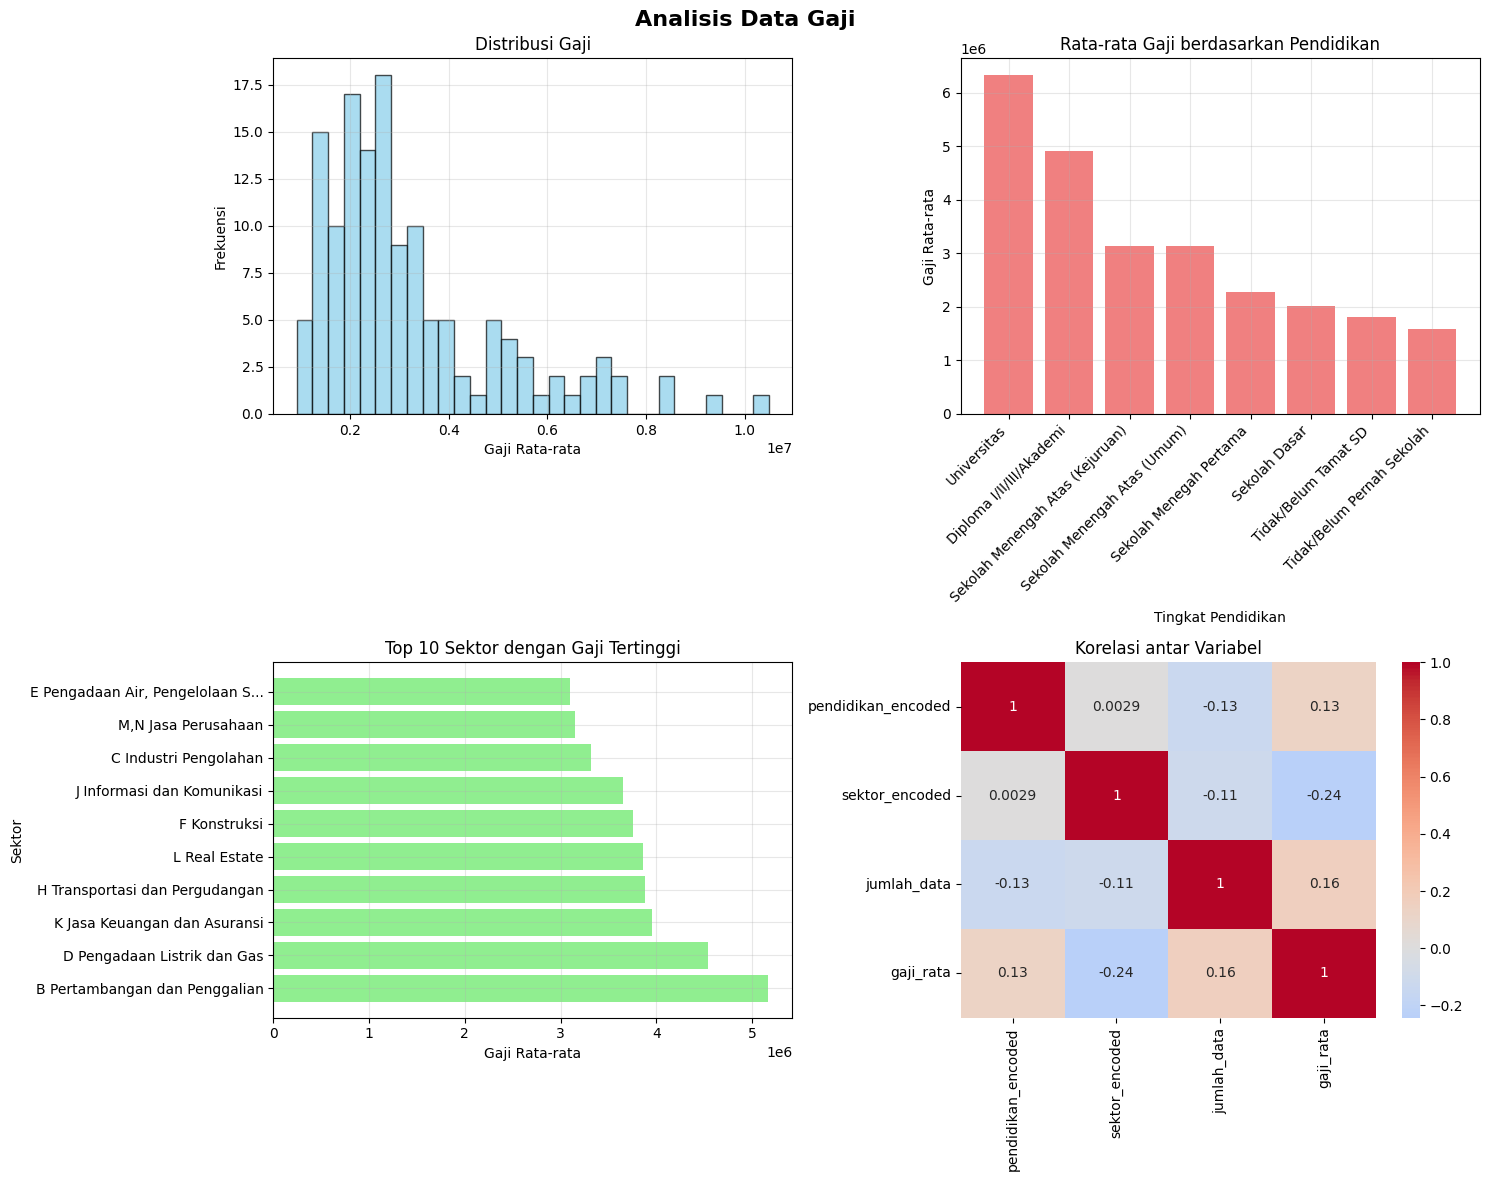

In [31]:
# 4. VISUALISASI DATA
print("\n4. VISUALISASI DATA")
print("-" * 50)

# Setup plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analisis Data Gaji', fontsize=16, fontweight='bold')

# Plot 1: Distribusi gaji
axes[0,0].hist(df_model['gaji_rata'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribusi Gaji')
axes[0,0].set_xlabel('Gaji Rata-rata')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Gaji berdasarkan pendidikan
gaji_pendidikan = df_model.groupby('pendidikan')['gaji_rata'].mean().sort_values(ascending=False)
axes[0,1].bar(range(len(gaji_pendidikan)), gaji_pendidikan.values, color='lightcoral')
axes[0,1].set_title('Rata-rata Gaji berdasarkan Pendidikan')
axes[0,1].set_xlabel('Tingkat Pendidikan')
axes[0,1].set_ylabel('Gaji Rata-rata')
axes[0,1].set_xticks(range(len(gaji_pendidikan)))
axes[0,1].set_xticklabels(gaji_pendidikan.index, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Top 10 sektor dengan gaji tertinggi
gaji_sektor = df_model.groupby('sektor')['gaji_rata'].mean().sort_values(ascending=False).head(10)
axes[1,0].barh(range(len(gaji_sektor)), gaji_sektor.values, color='lightgreen')
axes[1,0].set_title('Top 10 Sektor dengan Gaji Tertinggi')
axes[1,0].set_xlabel('Gaji Rata-rata')
axes[1,0].set_ylabel('Sektor')
axes[1,0].set_yticks(range(len(gaji_sektor)))
axes[1,0].set_yticklabels([s[:30] + '...' if len(s) > 30 else s for s in gaji_sektor.index])
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Korelasi matrix
correlation_data = df_model[['pendidikan_encoded', 'sektor_encoded', 'jumlah_data', 'gaji_rata']]
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Korelasi antar Variabel')

plt.tight_layout()
plt.show()

In [32]:
# 5. PERSIAPAN DATA UNTUK MODELING
print("\n5. PERSIAPAN DATA UNTUK MODELING")
print("-" * 50)

# Define features dan target
X = df_model[['pendidikan_encoded', 'sektor_encoded', 'jumlah_data']]
y = df_model['gaji_rata']

print(f"✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")


5. PERSIAPAN DATA UNTUK MODELING
--------------------------------------------------
✓ Features shape: (138, 3)
✓ Target shape: (138,)
✓ Training set: 110 samples
✓ Test set: 28 samples


In [33]:
# 6. TRAINING RANDOM FOREST MODEL
print("\n6. TRAINING RANDOM FOREST MODEL")
print("-" * 50)

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

# Training model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("✓ Model training selesai!")


6. TRAINING RANDOM FOREST MODEL
--------------------------------------------------
Training Random Forest model...
✓ Model training selesai!


In [34]:
# 7. EVALUASI MODEL
print("\n7. EVALUASI MODEL")
print("-" * 50)

# Prediksi
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Hitung metrik evaluasi
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("HASIL EVALUASI MODEL:")
print(f"Training R² Score    : {train_r2:.4f}")
print(f"Test R² Score        : {test_r2:.4f}")
print(f"Training RMSE        : {np.sqrt(train_mse):,.0f}")
print(f"Test RMSE            : {np.sqrt(test_mse):,.0f}")
print(f"Training MAE         : {train_mae:,.0f}")
print(f"Test MAE             : {test_mae:,.0f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R²  : {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


7. EVALUASI MODEL
--------------------------------------------------
HASIL EVALUASI MODEL:
Training R² Score    : 0.8614
Test R² Score        : 0.6313
Training RMSE        : 744,097
Test RMSE            : 648,335
Training MAE         : 483,822
Test MAE             : 432,666
Cross-validation R²  : -0.6608 (+/- 1.6478)



8. FEATURE IMPORTANCE
--------------------------------------------------
Tingkat Kepentingan Fitur:
Pendidikan     : 0.8129
Sektor         : 0.1865
Jumlah Data    : 0.0006


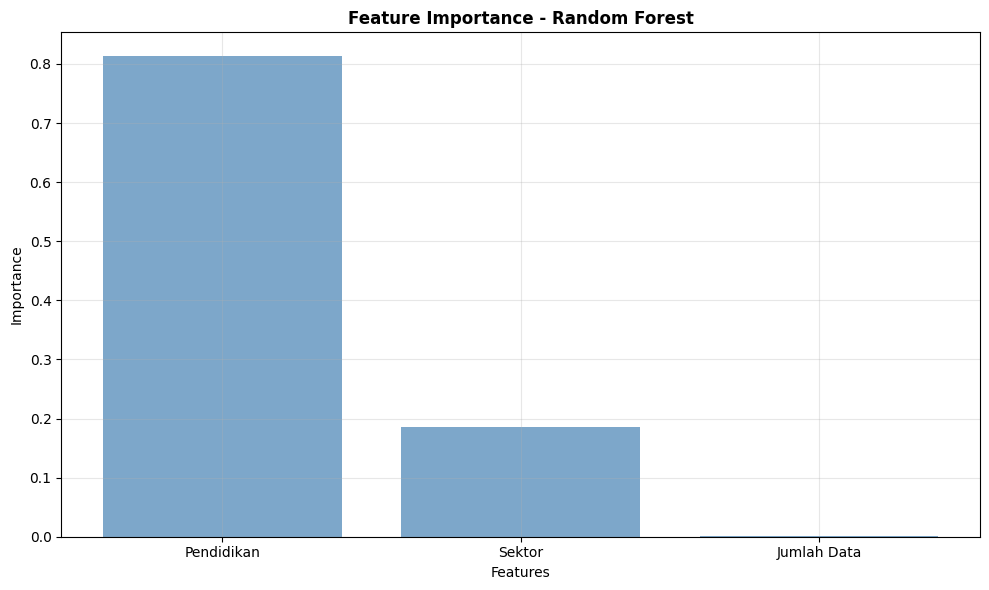

In [35]:
# 8. FEATURE IMPORTANCE
print("\n8. FEATURE IMPORTANCE")
print("-" * 50)

feature_names = ['Pendidikan', 'Sektor', 'Jumlah Data']
feature_importance = rf_model.feature_importances_

# Tampilkan feature importance
print("Tingkat Kepentingan Fitur:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name:<15}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices], color='steelblue', alpha=0.7)
plt.title('Feature Importance - Random Forest', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
# 9. HYPERPARAMETER TUNING
print("\n9. HYPERPARAMETER TUNING")
print("-" * 50)

# Grid search untuk optimasi hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Melakukan Grid Search...")
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("✓ Grid Search selesai!")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Model terbaik
best_rf = grid_search.best_estimator_
y_test_pred_best = best_rf.predict(X_test)
best_r2 = r2_score(y_test, y_test_pred_best)
best_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"Improved Test R²: {best_r2:.4f}")
print(f"Improved Test RMSE: {best_rmse:,.0f}")


9. HYPERPARAMETER TUNING
--------------------------------------------------
Melakukan Grid Search...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
✓ Grid Search selesai!
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.7336
Improved Test R²: 0.6292
Improved Test RMSE: 650,188



10. VISUALISASI HASIL PREDIKSI
--------------------------------------------------


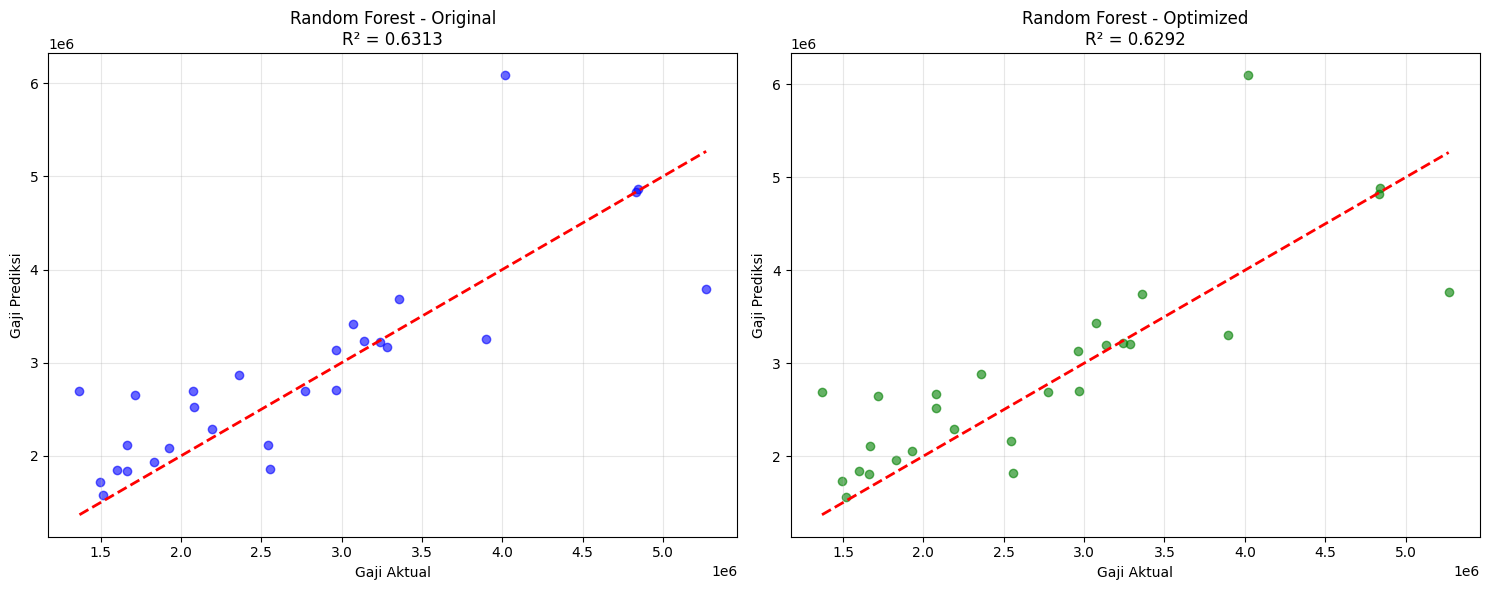

In [37]:
# 10. VISUALISASI HASIL PREDIKSI
print("\n10. VISUALISASI HASIL PREDIKSI")
print("-" * 50)

# Plot prediksi vs aktual
plt.figure(figsize=(15, 6))

# Subplot 1: Model original
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Gaji Aktual')
plt.ylabel('Gaji Prediksi')
plt.title(f'Random Forest - Original\nR² = {test_r2:.4f}')
plt.grid(True, alpha=0.3)

# Subplot 2: Model terbaik
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_best, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Gaji Aktual')
plt.ylabel('Gaji Prediksi')
plt.title(f'Random Forest - Optimized\nR² = {best_r2:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [38]:
# 11. FUNGSI PREDIKSI
print("\n11. FUNGSI PREDIKSI GAJI")
print("-" * 50)

def prediksi_gaji(pendidikan, sektor, jumlah_data=2):
    """
    Fungsi untuk memprediksi gaji berdasarkan input
    
    Parameters:
    - pendidikan: tingkat pendidikan
    - sektor: sektor pekerjaan
    - jumlah_data: jumlah data (default=2)
    """
    try:
        # Encode input
        pendidikan_encoded = le_pendidikan.transform([pendidikan])[0]
        sektor_encoded = le_sektor.transform([sektor])[0]
        
        # Buat input array
        input_data = np.array([[pendidikan_encoded, sektor_encoded, jumlah_data]])
        
        # Prediksi
        prediksi = best_rf.predict(input_data)[0]
        
        return prediksi
    except:
        return "Error: Input tidak valid"

# Contoh penggunaan
print("CONTOH PREDIKSI:")
print("-" * 30)

# Ambil sample kategori yang ada
sample_pendidikan = le_pendidikan.classes_[0] if len(le_pendidikan.classes_) > 0 else "Universitas"
sample_sektor = le_sektor.classes_[0] if len(le_sektor.classes_) > 0 else "IT"

try:
    hasil_prediksi = prediksi_gaji(sample_pendidikan, sample_sektor, 2)
    print(f"Pendidikan: {sample_pendidikan}")
    print(f"Sektor: {sample_sektor}")
    print(f"Prediksi Gaji: Rp {hasil_prediksi:,.0f}")
except:
    print("Contoh prediksi tidak dapat ditampilkan karena keterbatasan data")


11. FUNGSI PREDIKSI GAJI
--------------------------------------------------
CONTOH PREDIKSI:
------------------------------
Pendidikan: Diploma I/II/III/Akademi
Sektor: A Pertanian, Kehutanan dan Perikanan
Prediksi Gaji: Rp 5,927,347


In [39]:
# 12. KESIMPULAN
print("\n12. KESIMPULAN")
print("-" * 50)
print("✓ Model Random Forest berhasil dilatih untuk prediksi gaji")
print(f"✓ Akurasi model (R²): {best_r2:.4f}")
print(f"✓ Error rata-rata (RMSE): Rp {best_rmse:,.0f}")
print("✓ Model dapat digunakan untuk prediksi gaji berdasarkan:")
print("  - Tingkat Pendidikan")
print("  - Sektor Pekerjaan") 
print("  - Jumlah Data Sampel")

print("\n" + "="*60)
print("ANALISIS SELESAI!")
print("="*60)


12. KESIMPULAN
--------------------------------------------------
✓ Model Random Forest berhasil dilatih untuk prediksi gaji
✓ Akurasi model (R²): 0.6292
✓ Error rata-rata (RMSE): Rp 650,188
✓ Model dapat digunakan untuk prediksi gaji berdasarkan:
  - Tingkat Pendidikan
  - Sektor Pekerjaan
  - Jumlah Data Sampel

ANALISIS SELESAI!


## 

PERBANDINGAN PERFORMA MODEL REGRESI UNTUK PREDIKSI GAJI

1. MEMUAT DAN MEMPROSES DATA
--------------------------------------------------
✓ Data berhasil dimuat: 138 baris, 23 kolom
✓ Data setelah filter: 130 baris

2. PERSIAPAN FITUR UNTUK SETIAP MODEL
--------------------------------------------------
✓ Fitur Linear/Polynomial: 18 fitur
  - 1 fitur pendidikan (encoded)
  - 17 fitur sektor (one-hot)
✓ Fitur Random Forest: 3 fitur
  - 1 fitur pendidikan (label encoded)
  - 1 fitur sektor (label encoded)
  - 1 fitur jumlah_data

3. PEMBAGIAN DATA TRAINING DAN TESTING
--------------------------------------------------
✓ Data Linear/Polynomial - Train: 104, Test: 26
✓ Data Random Forest - Train: 104, Test: 26

4. TRAINING SEMUA MODEL
--------------------------------------------------
Training Linear Regression...
✓ Linear Regression selesai
Training Polynomial Regression (degree=3)...
✓ Polynomial Regression selesai
Training Random Forest...
✓ Random Forest selesai

5. EVALUASI PERFORMA MO

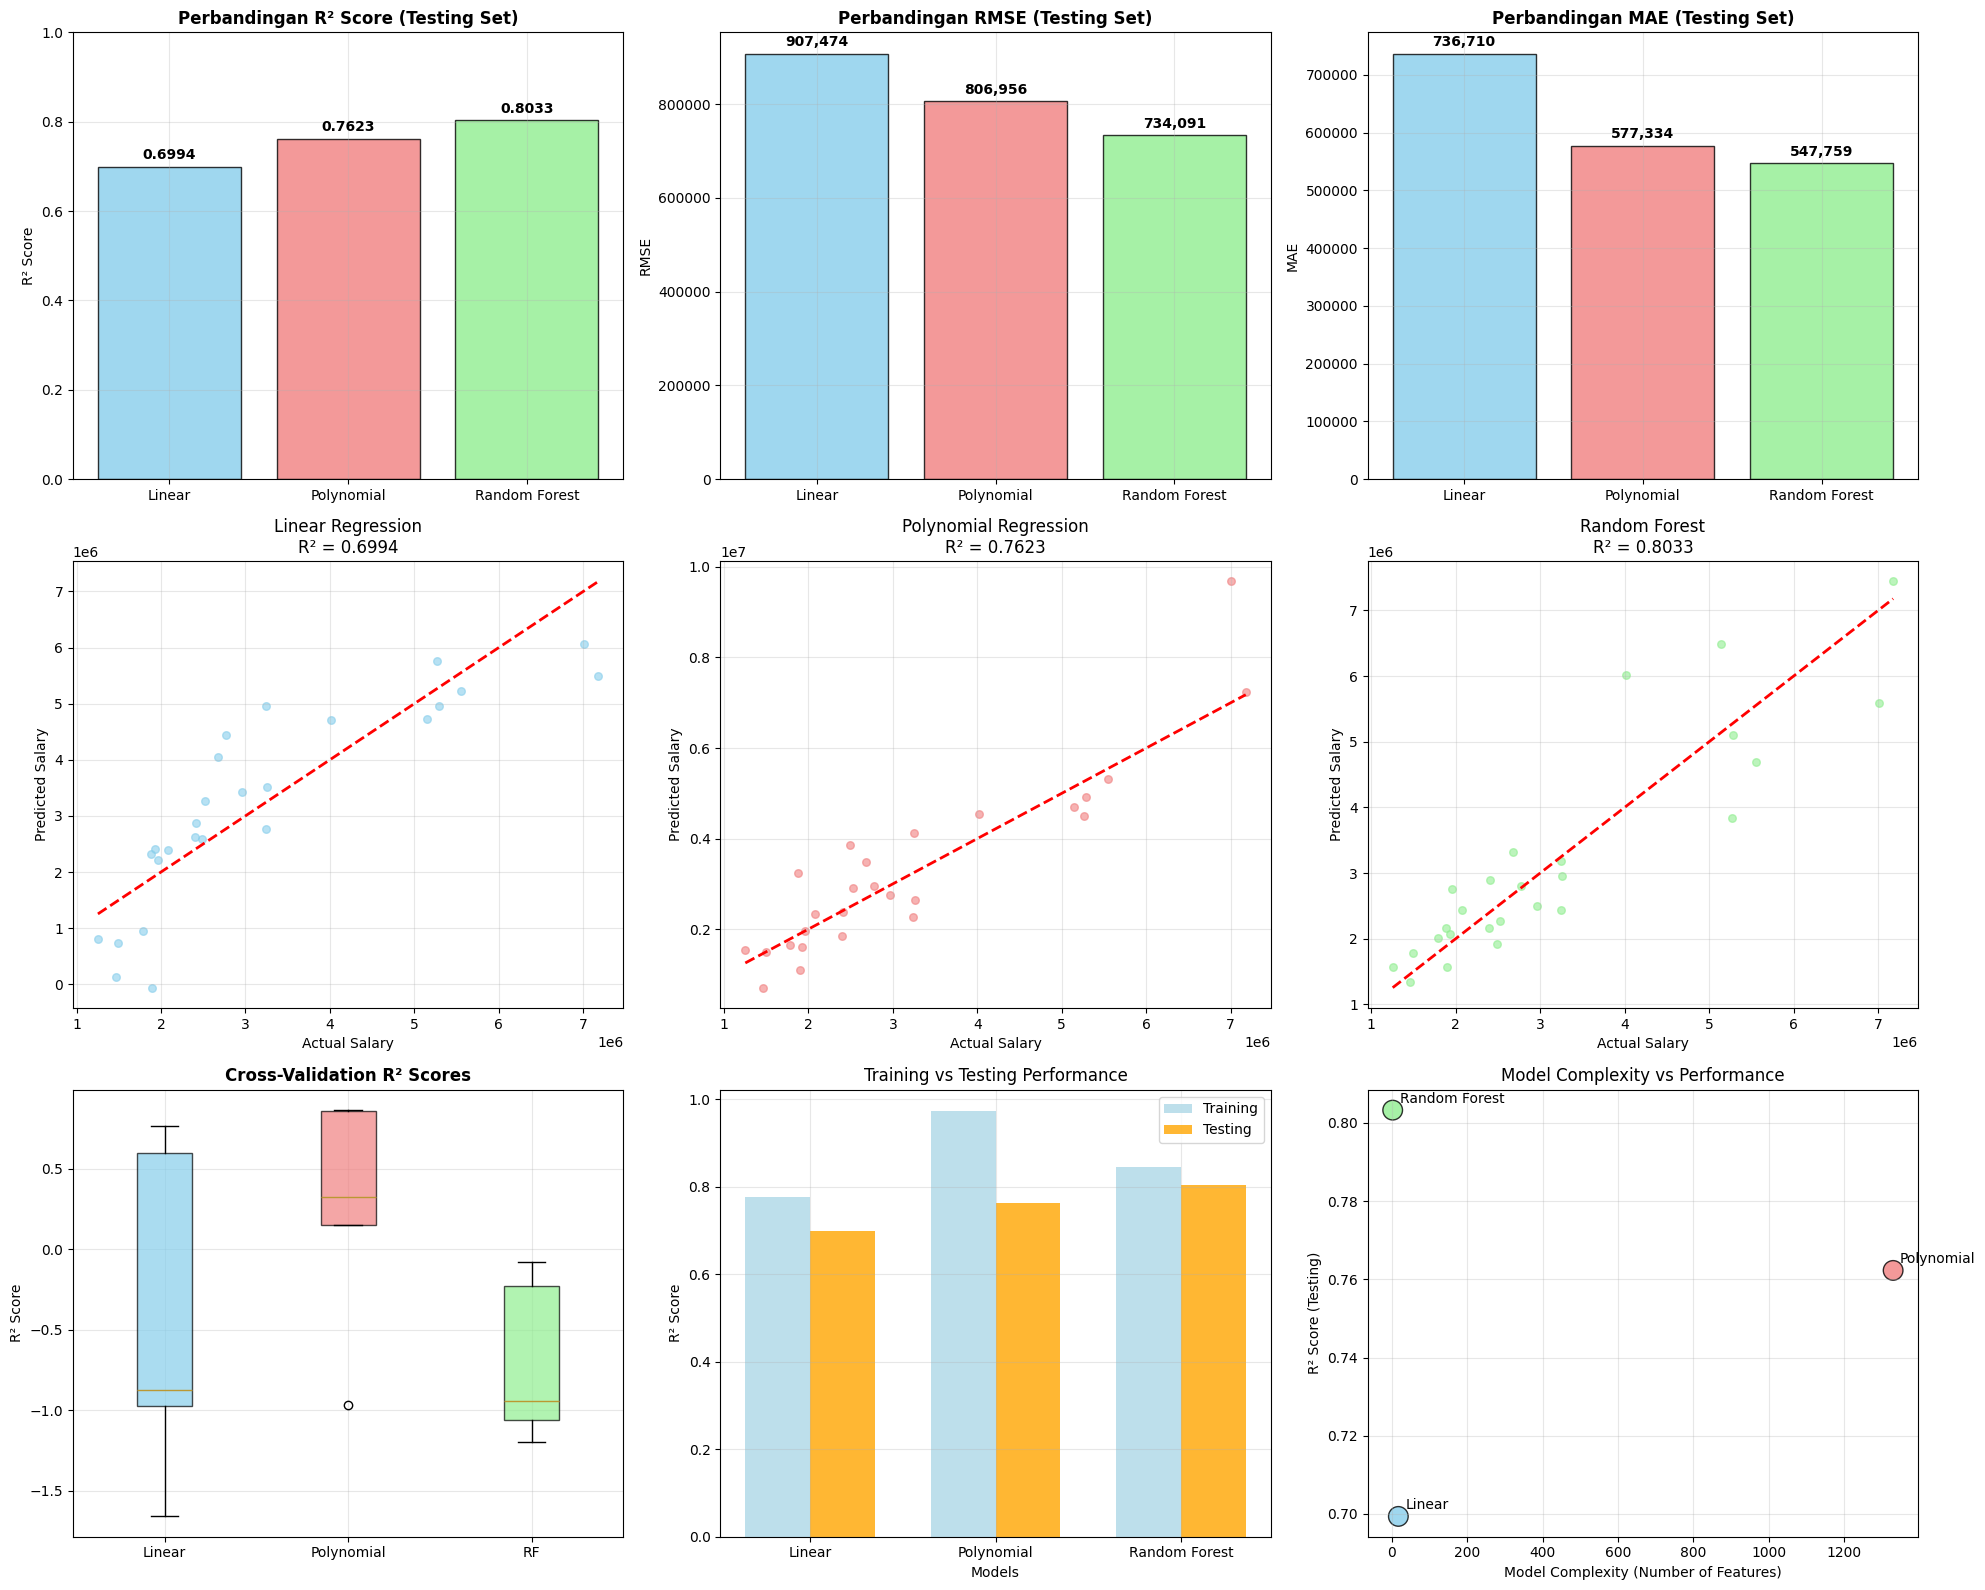


8. RINGKASAN PERBANDINGAN
--------------------------------------------------

TABEL RINGKASAN PERFORMA:
Model                R² (Test)  RMSE         MAE          CV R²      CV Std     Features  
----------------------------------------------------------------------------------------------------
Linear Regression    0.6994     907474       736710       -0.4269    0.9479     18        
Polynomial Regression 0.7623     806956       577334       0.2451     0.6697     1329      
Random Forest        0.8033     734091       547759       -0.7009    0.4573     3         

9. REKOMENDASI MODEL
--------------------------------------------------
ANALISIS PERFORMA:
✓ Model dengan R² tertinggi: Random Forest (0.8033)
✓ Model dengan RMSE terendah: Random Forest
✓ Model dengan MAE terendah: Random Forest
✓ Model dengan CV terstabil: Random Forest

REKOMENDASI:
🎯 Model Random Forest direkomendasikan karena:
   - R² Score tinggi: 0.8033
   - Cross-validation stabil: -0.7009 ± 0.4573

ANALISIS PERBANDI

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("=" * 70)
print("PERBANDINGAN PERFORMA MODEL REGRESI UNTUK PREDIKSI GAJI")
print("=" * 70)

# 1. LOAD DAN PREPROCESSING DATA
print("\n1. MEMUAT DAN MEMPROSES DATA")
print("-" * 50)

# Membaca data
df = pd.read_csv('data_gaji_final.csv')
print(f"✓ Data berhasil dimuat: {len(df)} baris, {len(df.columns)} kolom")

# Filter data (hilangkan baris dengan sektor 'Total')
df_filtered = df[df['sektor'] != 'Total'].copy()
print(f"✓ Data setelah filter: {len(df_filtered)} baris")

# Persiapan fitur untuk setiap model
print("\n2. PERSIAPAN FITUR UNTUK SETIAP MODEL")
print("-" * 50)

# === FITUR UNTUK LINEAR DAN POLYNOMIAL REGRESSION ===
# Menggunakan pendidikan_encoded dan one-hot encoded sektor
feature_cols_linear = ['pendidikan_encoded']
sektor_cols = [col for col in df_filtered.columns if col.startswith('sektor_') and col != 'sektor_Total']
feature_cols_linear.extend(sektor_cols)

X_linear = df_filtered[feature_cols_linear]
y = df_filtered['gaji_rata']

print(f"✓ Fitur Linear/Polynomial: {len(feature_cols_linear)} fitur")
print(f"  - 1 fitur pendidikan (encoded)")
print(f"  - {len(sektor_cols)} fitur sektor (one-hot)")

# === FITUR UNTUK RANDOM FOREST ===
# Menggunakan label encoding untuk kategorikal
le_pendidikan = LabelEncoder()
le_sektor = LabelEncoder()

df_rf = df_filtered[['pendidikan', 'sektor', 'gaji_rata', 'jumlah_data']].copy()
df_rf = df_rf.dropna()

df_rf['pendidikan_encoded_rf'] = le_pendidikan.fit_transform(df_rf['pendidikan'])
df_rf['sektor_encoded_rf'] = le_sektor.fit_transform(df_rf['sektor'])

X_rf = df_rf[['pendidikan_encoded_rf', 'sektor_encoded_rf', 'jumlah_data']]
y_rf = df_rf['gaji_rata']

print(f"✓ Fitur Random Forest: {X_rf.shape[1]} fitur")
print(f"  - 1 fitur pendidikan (label encoded)")
print(f"  - 1 fitur sektor (label encoded)")
print(f"  - 1 fitur jumlah_data")

# 3. SPLIT DATA
print("\n3. PEMBAGIAN DATA TRAINING DAN TESTING")
print("-" * 50)

# Split untuk Linear/Polynomial
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y, test_size=0.2, random_state=42
)

# Split untuk Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

print(f"✓ Data Linear/Polynomial - Train: {len(X_train_linear)}, Test: {len(X_test_linear)}")
print(f"✓ Data Random Forest - Train: {len(X_train_rf)}, Test: {len(X_test_rf)}")

# 4. TRAINING MODELS
print("\n4. TRAINING SEMUA MODEL")
print("-" * 50)

# === MODEL 1: LINEAR REGRESSION ===
print("Training Linear Regression...")
model_linear = LinearRegression()
model_linear.fit(X_train_linear, y_train_linear)

y_pred_train_linear = model_linear.predict(X_train_linear)
y_pred_test_linear = model_linear.predict(X_test_linear)
print("✓ Linear Regression selesai")

# === MODEL 2: POLYNOMIAL REGRESSION ===
print("Training Polynomial Regression (degree=3)...")
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_linear)
X_test_poly = poly_features.transform(X_test_linear)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_linear)

y_pred_train_poly = model_poly.predict(X_train_poly)
y_pred_test_poly = model_poly.predict(X_test_poly)
print("✓ Polynomial Regression selesai")

# === MODEL 3: RANDOM FOREST ===
print("Training Random Forest...")
model_rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)
model_rf.fit(X_train_rf, y_train_rf)

y_pred_train_rf = model_rf.predict(X_train_rf)
y_pred_test_rf = model_rf.predict(X_test_rf)
print("✓ Random Forest selesai")

# 5. EVALUASI PERFORMA
print("\n5. EVALUASI PERFORMA MODEL")
print("-" * 50)

# Fungsi untuk menghitung metrik
def calculate_metrics(y_true, y_pred, model_name, dataset_type):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Dataset': dataset_type,
        'R2_Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse
    }

# Hitung metrik untuk semua model
results = []

# Linear Regression
results.append(calculate_metrics(y_train_linear, y_pred_train_linear, 'Linear Regression', 'Training'))
results.append(calculate_metrics(y_test_linear, y_pred_test_linear, 'Linear Regression', 'Testing'))

# Polynomial Regression
results.append(calculate_metrics(y_train_linear, y_pred_train_poly, 'Polynomial Regression', 'Training'))
results.append(calculate_metrics(y_test_linear, y_pred_test_poly, 'Polynomial Regression', 'Testing'))

# Random Forest
results.append(calculate_metrics(y_train_rf, y_pred_train_rf, 'Random Forest', 'Training'))
results.append(calculate_metrics(y_test_rf, y_pred_test_rf, 'Random Forest', 'Testing'))

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Tampilkan hasil
print("HASIL EVALUASI PERFORMA:")
print("=" * 80)
for model in ['Linear Regression', 'Polynomial Regression', 'Random Forest']:
    print(f"\n{model.upper()}:")
    train_data = results_df[(results_df['Model'] == model) & (results_df['Dataset'] == 'Training')]
    test_data = results_df[(results_df['Model'] == model) & (results_df['Dataset'] == 'Testing')]
    
    if not train_data.empty and not test_data.empty:
        print(f"  Training  - R²: {train_data.iloc[0]['R2_Score']:.4f}, RMSE: {train_data.iloc[0]['RMSE']:,.0f}, MAE: {train_data.iloc[0]['MAE']:,.0f}")
        print(f"  Testing   - R²: {test_data.iloc[0]['R2_Score']:.4f}, RMSE: {test_data.iloc[0]['RMSE']:,.0f}, MAE: {test_data.iloc[0]['MAE']:,.0f}")

# 6. CROSS-VALIDATION
print("\n6. CROSS-VALIDATION (5-FOLD)")
print("-" * 50)

# Cross-validation untuk setiap model
cv_results = {}

# Linear Regression CV
cv_linear = cross_val_score(model_linear, X_linear, y, cv=5, scoring='r2')
cv_results['Linear Regression'] = cv_linear

# Polynomial Regression CV
X_poly_full = poly_features.transform(X_linear)
cv_poly = cross_val_score(model_poly, X_poly_full, y, cv=5, scoring='r2')
cv_results['Polynomial Regression'] = cv_poly

# Random Forest CV
cv_rf = cross_val_score(model_rf, X_rf, y_rf, cv=5, scoring='r2')
cv_results['Random Forest'] = cv_rf

print("HASIL CROSS-VALIDATION (R² Score):")
for model_name, scores in cv_results.items():
    print(f"{model_name:<25}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# 7. VISUALISASI PERBANDINGAN
print("\n7. VISUALISASI PERBANDINGAN")
print("-" * 50)

# Setup figure
fig = plt.figure(figsize=(20, 16))

# Plot 1: Bar Chart R² Score Comparison
plt.subplot(3, 3, 1)
test_r2_scores = results_df[results_df['Dataset'] == 'Testing']['R2_Score'].values
model_names = ['Linear', 'Polynomial', 'Random Forest']
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars = plt.bar(model_names, test_r2_scores, color=colors, alpha=0.8, edgecolor='black')
plt.title('Perbandingan R² Score (Testing Set)', fontsize=12, fontweight='bold')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Tambahkan nilai di atas bar
for bar, score in zip(bars, test_r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Plot 2: RMSE Comparison
plt.subplot(3, 3, 2)
test_rmse_scores = results_df[results_df['Dataset'] == 'Testing']['RMSE'].values
bars = plt.bar(model_names, test_rmse_scores, color=colors, alpha=0.8, edgecolor='black')
plt.title('Perbandingan RMSE (Testing Set)', fontsize=12, fontweight='bold')
plt.ylabel('RMSE')

for bar, score in zip(bars, test_rmse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(test_rmse_scores)*0.01, 
             f'{score:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Plot 3: MAE Comparison
plt.subplot(3, 3, 3)
test_mae_scores = results_df[results_df['Dataset'] == 'Testing']['MAE'].values
bars = plt.bar(model_names, test_mae_scores, color=colors, alpha=0.8, edgecolor='black')
plt.title('Perbandingan MAE (Testing Set)', fontsize=12, fontweight='bold')
plt.ylabel('MAE')

for bar, score in zip(bars, test_mae_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(test_mae_scores)*0.01, 
             f'{score:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Plot 4-6: Actual vs Predicted untuk setiap model
# Linear Regression
plt.subplot(3, 3, 4)
plt.scatter(y_test_linear, y_pred_test_linear, alpha=0.6, color='skyblue', s=30)
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Linear Regression\nR² = {test_r2_scores[0]:.4f}')
plt.grid(True, alpha=0.3)

# Polynomial Regression
plt.subplot(3, 3, 5)
plt.scatter(y_test_linear, y_pred_test_poly, alpha=0.6, color='lightcoral', s=30)
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Polynomial Regression\nR² = {test_r2_scores[1]:.4f}')
plt.grid(True, alpha=0.3)

# Random Forest
plt.subplot(3, 3, 6)
plt.scatter(y_test_rf, y_pred_test_rf, alpha=0.6, color='lightgreen', s=30)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Random Forest\nR² = {test_r2_scores[2]:.4f}')
plt.grid(True, alpha=0.3)

# Plot 7: Cross-Validation Box Plot
plt.subplot(3, 3, 7)
cv_data = [cv_results['Linear Regression'], cv_results['Polynomial Regression'], cv_results['Random Forest']]
box_plot = plt.boxplot(cv_data, labels=['Linear', 'Polynomial', 'RF'], patch_artist=True)

# Warnai box plot
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Cross-Validation R² Scores', fontsize=12, fontweight='bold')
plt.ylabel('R² Score')
plt.grid(True, alpha=0.3)

# Plot 8: Training vs Testing Performance
plt.subplot(3, 3, 8)
train_r2 = results_df[results_df['Dataset'] == 'Training']['R2_Score'].values
test_r2 = results_df[results_df['Dataset'] == 'Testing']['R2_Score'].values

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_r2, width, label='Training', color='lightblue', alpha=0.8)
plt.bar(x + width/2, test_r2, width, label='Testing', color='orange', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Training vs Testing Performance')
plt.xticks(x, model_names)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 9: Model Complexity vs Performance
plt.subplot(3, 3, 9)
complexity = [len(feature_cols_linear), len(poly_features.get_feature_names_out(feature_cols_linear)), X_rf.shape[1]]
performance = test_r2_scores

plt.scatter(complexity, performance, c=colors, s=200, alpha=0.8, edgecolors='black')
for i, (comp, perf, name) in enumerate(zip(complexity, performance, model_names)):
    plt.annotate(name, (comp, perf), xytext=(5, 5), textcoords='offset points')

plt.xlabel('Model Complexity (Number of Features)')
plt.ylabel('R² Score (Testing)')
plt.title('Model Complexity vs Performance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. SUMMARY TABLE
print("\n8. RINGKASAN PERBANDINGAN")
print("-" * 50)

# Buat summary table
summary_data = []
for model in ['Linear Regression', 'Polynomial Regression', 'Random Forest']:
    test_data = results_df[(results_df['Model'] == model) & (results_df['Dataset'] == 'Testing')]
    cv_data = cv_results[model]
    
    if not test_data.empty:
        summary_data.append({
            'Model': model,
            'R² (Test)': test_data.iloc[0]['R2_Score'],
            'RMSE (Test)': test_data.iloc[0]['RMSE'],
            'MAE (Test)': test_data.iloc[0]['MAE'],
            'CV R² (Mean)': cv_data.mean(),
            'CV R² (Std)': cv_data.std(),
            'Complexity': len(feature_cols_linear) if 'Linear' in model else 
                         len(poly_features.get_feature_names_out(feature_cols_linear)) if 'Polynomial' in model else X_rf.shape[1]
        })

summary_df = pd.DataFrame(summary_data)

print("\nTABEL RINGKASAN PERFORMA:")
print("=" * 100)
print(f"{'Model':<20} {'R² (Test)':<10} {'RMSE':<12} {'MAE':<12} {'CV R²':<10} {'CV Std':<10} {'Features':<10}")
print("-" * 100)

for _, row in summary_df.iterrows():
    print(f"{row['Model']:<20} {row['R² (Test)']:<10.4f} {row['RMSE (Test)']:<12.0f} "
          f"{row['MAE (Test)']:<12.0f} {row['CV R² (Mean)']:<10.4f} {row['CV R² (Std)']:<10.4f} {row['Complexity']:<10}")

# 9. REKOMENDASI
print("\n9. REKOMENDASI MODEL")
print("-" * 50)

# Tentukan model terbaik berdasarkan R²
best_model_idx = summary_df['R² (Test)'].idxmax()
best_model = summary_df.iloc[best_model_idx]

print("ANALISIS PERFORMA:")
print(f"✓ Model dengan R² tertinggi: {best_model['Model']} ({best_model['R² (Test)']:.4f})")
print(f"✓ Model dengan RMSE terendah: {summary_df.loc[summary_df['RMSE (Test)'].idxmin(), 'Model']}")
print(f"✓ Model dengan MAE terendah: {summary_df.loc[summary_df['MAE (Test)'].idxmin(), 'Model']}")
print(f"✓ Model dengan CV terstabil: {summary_df.loc[summary_df['CV R² (Std)'].idxmin(), 'Model']}")

print(f"\nREKOMENDASI:")
if best_model['R² (Test)'] > 0.8:
    print(f"🎯 Model {best_model['Model']} direkomendasikan karena:")
    print(f"   - R² Score tinggi: {best_model['R² (Test)']:.4f}")
    print(f"   - Cross-validation stabil: {best_model['CV R² (Mean)']:.4f} ± {best_model['CV R² (Std)']:.4f}")
elif best_model['R² (Test)'] > 0.6:
    print(f"⚠️  Model {best_model['Model']} cukup baik dengan R² = {best_model['R² (Test)']:.4f}")
    print("   Pertimbangkan untuk:")
    print("   - Menambah fitur atau data")
    print("   - Hyperparameter tuning")
    print("   - Feature engineering")
else:
    print("⚠️  Semua model menunjukkan performa yang perlu diperbaiki")
    print("   Saran:")
    print("   - Periksa kualitas data")
    print("   - Tambah fitur yang relevan")
    print("   - Coba algoritma lain")

print("\n" + "=" * 70)
print("ANALISIS PERBANDINGAN MODEL SELESAI!")
print("=" * 70)